In [1]:
import json
import os
import json

import numpy as np
from doctr.datasets import SROIE, FUNSD
import matplotlib.pyplot as plt
import cv2

/Users/anastasiabogatenkova/miniconda3/envs/doc/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
train_set = SROIE(train=True, download=False)
img, target = train_set[0]

boxes = target['boxes']
img = img * 255
img = img.int().numpy()
img = np.moveaxis(img, 0, -1)

(1528, 1080, 3)
[0.3462963  0.20615183 0.61388886 0.21662304]


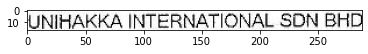

In [27]:
im_h, im_w, _ = img.shape
print(img.shape)

for box in boxes:
    x1, y1, x2, y2 = int(box[0] * im_w), int(box[1] * im_h), int(box[2] * im_w), int(box[3] * im_h)
    print(box)
    plt.imshow(img[y1:y2, x1:x2])
    break

In [30]:
out_dir = "../datasets/classification"

prefix = "SROIE"
i = 0
for img, target in train_set:
    boxes = target['boxes']
    img = img * 255
    img = img.int().numpy()
    img = np.moveaxis(img, 0, -1)
    im_h, im_w, _ = img.shape
    for box in boxes:
        x1, y1, x2, y2 = int(box[0] * im_w), int(box[1] * im_h), int(box[2] * im_w), int(box[3] * im_h)
        cv2.imwrite(os.path.join(out_dir, prefix, f"{prefix}_{i}.png"), img[y1:y2, x1:x2])
        i += 1

In [33]:
train_set = FUNSD(train=True, download=False)

prefix = "FUNSD"
i = 0
for img, target in train_set:
    boxes = target['boxes']
    img = img * 255
    img = img.int().numpy()
    img = np.moveaxis(img, 0, -1)
    im_h, im_w, _ = img.shape
    for box in boxes:
        x1, y1, x2, y2 = int(box[0] * im_w), int(box[1] * im_h), int(box[2] * im_w), int(box[3] * im_h)
        cv2.imwrite(os.path.join(out_dir, prefix, f"{prefix}_{i}.png"), img[y1:y2, x1:x2])
        i += 1

In [35]:
import tempfile
import zipfile

laws_dir = "/Users/anastasiabogatenkova/Downloads/law_with_cellar/original_documents"
prefix = "russian_raw"

for file_name in os.listdir(laws_dir):
    if not file_name.endswith(".zip"):
        continue
    with tempfile.TemporaryDirectory() as tmpdir:
        with zipfile.ZipFile(os.path.join(laws_dir, file_name), "r") as z_f:
            z_f.extractall(tmpdir)
        for img_name in os.listdir(tmpdir):
            if not img_name.endswith(".png"):
                continue
            os.replace(os.path.join(tmpdir, img_name), os.path.join(out_dir, prefix, img_name))

In [2]:
from doctr.models import detection_predictor

model = detection_predictor(arch='db_resnet50', pretrained=True).eval()

def get_bboxes(img_path: str):
    img = cv2.imread(img_path)
    out = model([img])
    h, w, _ = img.shape
    bboxes = [(int(box[0] * w), int(box[1] * h), int(box[2] * w), int(box[3] * h)) for box in out[0]]
    return bboxes

In [4]:
out_dir = "../datasets/classification"
in_prefix = "russian_raw"
prefix = "RUS"
i = 0
for img_name in os.listdir(os.path.join(out_dir, in_prefix)):
    if not img_name.endswith(".png"):
        continue
    boxes = get_bboxes(os.path.join(out_dir, in_prefix, img_name))
    img = cv2.imread(os.path.join(out_dir, in_prefix, img_name))
    for bbox in boxes:
        cv2.imwrite(os.path.join(out_dir, prefix, f"{prefix}_{i}.png"), img[bbox[1]:bbox[3],bbox[0]:bbox[2]])
        i += 1